<a href="https://colab.research.google.com/github/shivamanisuram/machine-learning-algortithms/blob/main/IMPLEMENTATION_OF_LINEAR_REGRESSION_FROM_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

w = w - α*dw

b = b - α*db


In [38]:
import numpy as np

LINEAR REGRESSION


In [75]:

class Linear_Regression():

    def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

    def fit( self, X, Y ) : # indentation corrected

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

    def update_weights( self ) : # indentation corrected

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

    def predict( self, X ) : # indentation corrected

        return X.dot( self.w ) + self.b



In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error #added a metric.  There are other options
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [47]:
salary_data=pd.read_csv("/content/salary_data.csv")

In [48]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [17]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [18]:
salary_data.shape

(30, 2)

In [19]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [21]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [22]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


splitting the feature and target


In [23]:
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,-1].values


In [24]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [25]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [55]:
#train test split
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

train the linear regression model

In [79]:
#train test split
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

# Create and train the model by calling the fit method
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)
model.fit(X_train, Y_train) # Call the fit method to initialize weights and bias

print(X_train.shape)

# Now you can access the weight (w) and bias (b) attributes
print('weight=',model.w)
print('bias=',model.b)

(20, 1)
weight= [9514.40099904]
bias= 23697.406507136307


In [81]:
#y=9514(experience)+23697


In [80]:
test_data_prediction=model.predict(X_test)

In [82]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Text(0, 0.5, 'salary')

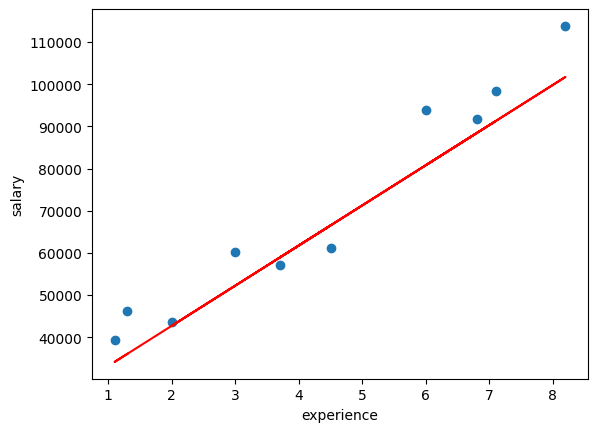

In [83]:
plt.scatter(X_test,y_test)
plt.plot(X_test,test_data_prediction,color='red')
plt.xlabel('experience')
plt.ylabel('salary')